## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice.
count_mice = list(merged_data["Mouse ID"].value_counts()) 
  
# print the unique value counts 
print("Number of mice:", len(count_mice))

Number of mice: 249


In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Note from Kelly: I didn't quite understand the baked-in instructions for this set of steps, 
# so I did what I thought would work and got the appropriate dataframe. In the dataframe cleaned_data,
# there are no duplicates for any mouse on the same timepoint. There are a few places throughout these
# instructions where something similar happened- I would understand the general goal of the instructions,
# but not the steps to get there. I believe all of my outputs still fit the requirements for this assignment.



In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
# Select duplicate rows except first occurrence based on all columns
duplicate_entries = pd.DataFrame(merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])])
print(duplicate_entries)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
counting_mice = list(cleaned_data["Mouse ID"].value_counts()) 
  
# print the unique value counts 
print("Number of mice:", len(counting_mice))

Number of mice: 249


## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).mean().drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})
Median = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).median().drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})
Variance = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).var().drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"Variance Tumor Volume (mm3)"})
StDev = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).std().drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"Standard Deviation Tumor Volume (mm3)"})
SEM = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).sem().drop(["Mouse ID", "Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"SEM Tumor Volume (mm3)"})

# Assemble the resulting series into a single summary dataframe.
Summary = pd.merge(Mean,Median,how='outer',on="Drug Regimen")
Summary = pd.merge(Summary,Variance,how='outer',on="Drug Regimen")
Summary = pd.merge(Summary,StDev,how='outer',on="Drug Regimen")
Summary = pd.merge(Summary,SEM,how='outer',on="Drug Regimen")
Summary



,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
## Already did this in the previous section
# Using the aggregation method, produce the same summary statistics in a single line

Summary_Agg = Summary.aggregate(['mean']).rename(index={'mean':'Aggregate Mean Across Regimens'})
Summary_Agg


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Aggregate Mean Across Regimens,50.982189,49.935849,47.795259,6.816315,0.500988


## Bar and Pie Charts

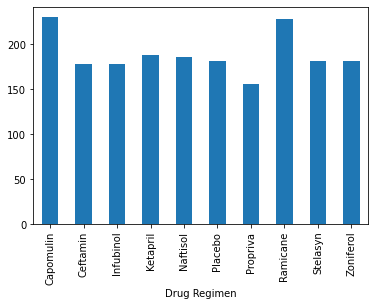

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Totals = pd.DataFrame(cleaned_data).groupby("Drug Regimen").count()
Totals.groupby("Drug Regimen")['Age_months'].sum().plot(kind='bar')


([<matplotlib.axis.XTick at 0x1a5927e7e50>,
 <a list of 10 Text major ticklabel objects>)

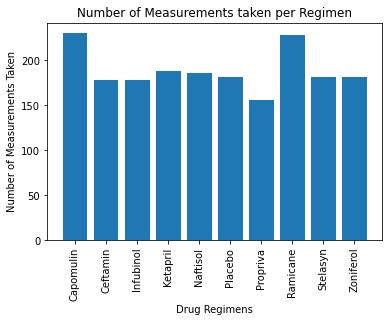

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

Totally = pd.DataFrame(Totals.groupby("Drug Regimen")['Age_months'].sum())

x_axis = Summary.reset_index()
x_axis = list(x_axis['Drug Regimen'])
y_axis = list(Totally['Age_months'])
plt.bar(x_axis, y_axis)
plt.title("Number of Measurements taken per Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements Taken")
plt.xticks(x_axis, rotation=90)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A592817CA0>],
      dtype=object)

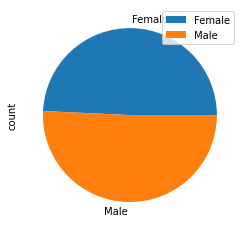

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_Summary = pd.DataFrame(cleaned_data).groupby("Sex")
Gender_Summary['Sex'].describe().drop(['unique','top', 'freq'],axis = 1).plot(kind='pie', subplots=True)

([<matplotlib.patches.Wedge at 0x1a592a1fcd0>,
 [Text(0.02562299800632446, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')])

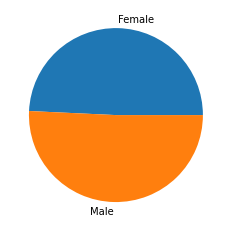

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Genders = Gender_Summary.describe()
labels = list(Genders.index.values)
sizes = list(Genders["Age_months"]['count'])
plt.pie(sizes, labels=labels)

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Tumor_Volume = cleaned_data.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID'])

Tumor_Volume = Tumor_Volume.loc[(Tumor_Volume['Drug Regimen']=="Capomulin") | 
                 (Tumor_Volume['Drug Regimen']=="Ramicane") | 
                 (Tumor_Volume['Drug Regimen']=="Infubinol") | 
                 (Tumor_Volume['Drug Regimen']=="Ceftamin")]
Tumor_Volume = Tumor_Volume.drop(['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'], axis = 1)
Tumor_Volume
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
834,f345,Infubinol,45,60.918767
134,r554,Capomulin,45,32.377357
144,m957,Capomulin,45,33.329098
800,e476,Infubinol,45,62.435404
154,c758,Ramicane,45,33.397653
...,...,...,...,...
669,c326,Infubinol,5,36.321346
1743,x226,Ceftamin,0,45.000000
1583,u153,Ceftamin,0,45.000000
594,b447,Ceftamin,0,45.000000


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = Tumor_Volume["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    # Determine outliers using upper and lower bounds

for i in Treatments:
    Tumor_Volumes = Tumor_Volume.loc[(Tumor_Volume['Drug Regimen']== i)]
    Volume_List = Tumor_Volumes["Tumor Volume (mm3)"]
    
    quartiles = Volume_List.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
                                    
    print(f"For the {i} drug regimen:")

    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n\n")

For the Infubinol drug regimen:
The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


For the Capomulin drug regimen:
The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


For the Ramicane drug regimen:
The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56

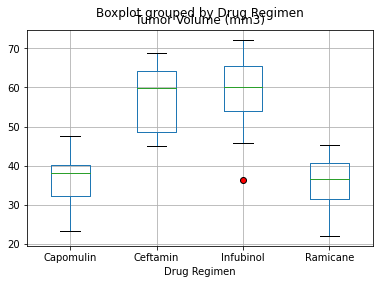

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Each plot on the chart should be one of the four drug regimens
# Each plot should measure the final tumor volumes reported per mouse for the specific drug regimen
flierprops = dict(marker='o', markerfacecolor='r')
Tumor_Volume_by_Drug_Regimen = Tumor_Volume.boxplot(column=['Tumor Volume (mm3)'], by = "Drug Regimen",flierprops=flierprops)
Tumor_Volume_by_Drug_Regimen

## Line and Scatter Plots

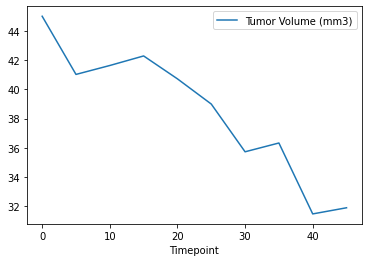

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_Mice = cleaned_data.loc[(cleaned_data['Drug Regimen']=="Capomulin")].sort_values('Mouse ID', ascending=False)
Capomulin_Mouse = Capomulin_Mice.iloc[1]['Mouse ID']
Capomulin_Mice_2 = Capomulin_Mice.loc[(Capomulin_Mice['Mouse ID']==Capomulin_Mouse)].sort_values('Timepoint', ascending=True)
Capomulin_Lines = Capomulin_Mice_2.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
Capomulin_Lines

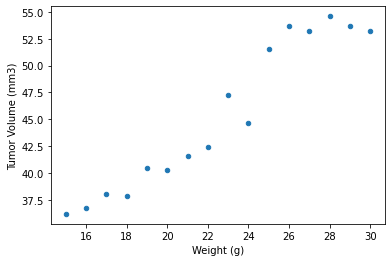

In [52]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Avg_Tumor_Volume_Per_Weight = cleaned_data.sort_values('Weight (g)', ascending=False).groupby('Weight (g)').mean().drop(['Age_months', 'Metastatic Sites', 'Timepoint'], axis = 1).reset_index()
Avg_Tumor_Scatter = Avg_Tumor_Volume_Per_Weight.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')
Avg_Tumor_Scatter

## Correlation and Regression

The correlation coefficient for the average weight and average tumor volume of mice on the Capomulin regimen is 0.96.


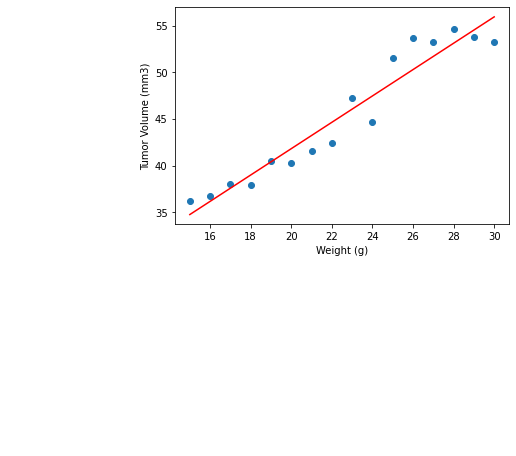

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = Avg_Tumor_Volume_Per_Weight.iloc[:,0]
tumor_vol = Avg_Tumor_Volume_Per_Weight.iloc[:,1]
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation coefficient for the average weight and average tumor volume of mice on the Capomulin regimen is {round(correlation[0],2)}.")

x_values = Avg_Tumor_Volume_Per_Weight['Weight (g)']
y_values = Avg_Tumor_Volume_Per_Weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()